# Wykres DFT przy użyciu numpy.fft

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
plt.style.use('Solarize_Light2')

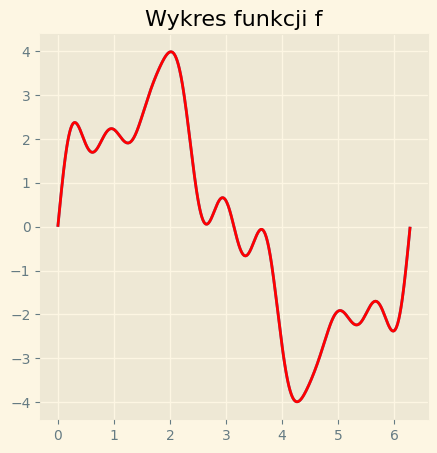

In [10]:
def samples(f, samplingRate):
    x = np.linspace(0, 2*np.pi, samplingRate)
    a = f(x)
    return (a, x)

# pary (częstotliwość, mnożnik)
sineComponents = [ (1, 3), (4, 1), (7, 0.5), (9, 0.3) ]

def f(t):
    value = 0
    for (freq, mul) in sineComponents:
        value += mul*np.sin(freq*t)
    return value

a, x = samples(f, 256)
aDraw, xDraw = samples(f, 2048)

plt.figure(figsize = (5, 5))
plt.title("Wykres funkcji f")
plt.plot(x, a)
plt.plot(xDraw, aDraw, 'r')

plt.show()

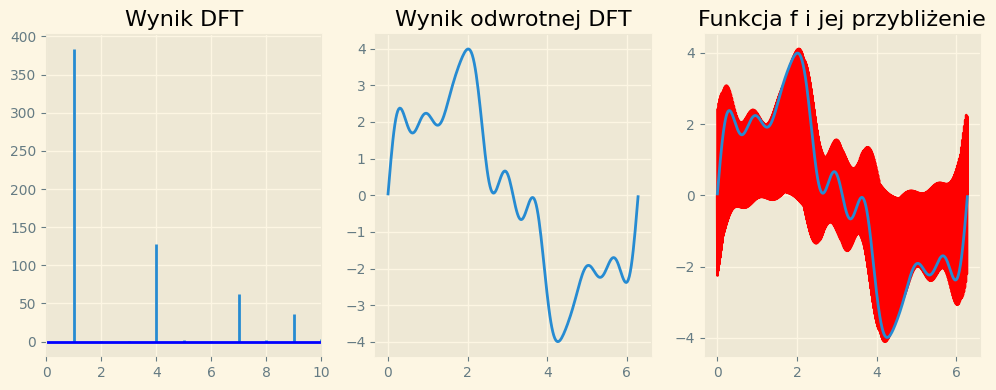

In [4]:
A = np.fft.fft(a)
freq = np.arange(len(a))

plt.figure(figsize = (10, 4))

plt.subplot(131)
plt.title("Wynik DFT")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.subplot(132)
plt.title("Wynik odwrotnej DFT")
plt.plot(x, np.fft.ifft(A))

plt.subplot(133)
plt.title("Funkcja f i jej przybliżenie")
aprox = [np.sum(A * np.exp(x*1j*np.arange(len(a))))/len(a) for x in xDraw]
plt.plot(xDraw, aprox, 'r')
plt.plot(xDraw, aDraw)

plt.tight_layout()
plt.show()

# Implementacja FFT (Cooley-Tukey)

In [6]:
def fft(a):
    if(len(a) == 1):
        return np.array(a)
    else:
        even = a[::2]
        odd = a[1::2]
        E = fft(even)
        O = fft(odd)
        dft1 = E  + np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * O
        dft2 = E - np.exp(-2*np.pi*1j/len(a)*np.arange(len(a)/2)) * O
        return np.concatenate( (dft1, dft2) )

In [7]:
def swapImRe(x):
    return np.imag(x) + 1j*np.real(x)

def ifft(A):
    a = swapImRe(A)
    a = fft(a)
    a = swapImRe(a)
    a /= len(a)
    return a

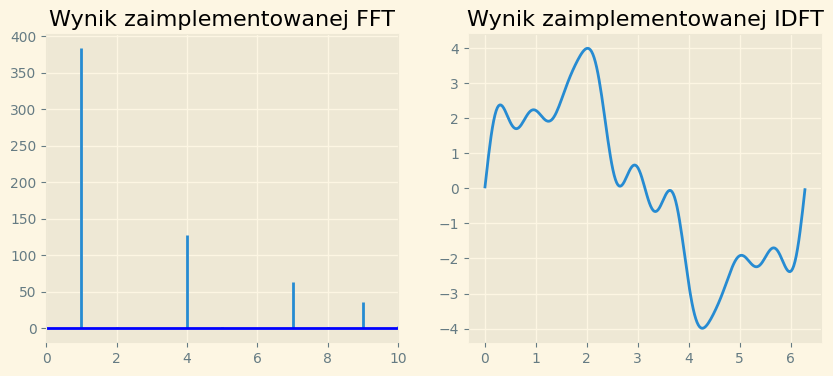

In [10]:
A = fft(a)

plt.figure(figsize = (10, 4))
plt.subplot(121)
plt.title("Wynik zaimplementowanej FFT")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.subplot(122)
plt.title("Wynik zaimplementowanej IDFT")
plt.plot(x, ifft(A))

plt.show()

# Porównanie z obliczaniem z definicji

In [11]:
def dft(a):
    omega = np.exp(1j* 2* np.pi / len(a))
    return [ np.sum(a * omega**(-k * np.arange(len(a)) )) for k in np.arange(len(a))]

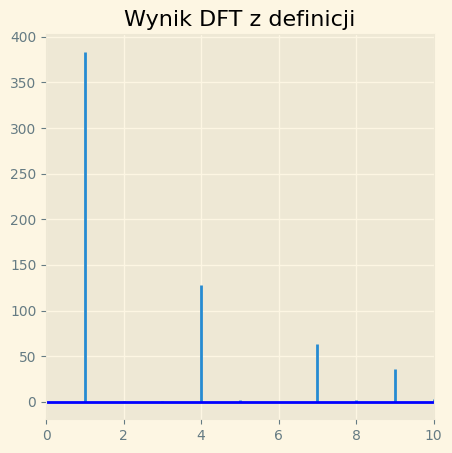

In [12]:
A = dft(a)

plt.figure(figsize = (5, 5))
plt.title("Wynik DFT z definicji")
plt.stem(freq, np.abs(A), markerfmt=" ", basefmt="-b")
plt.xlim(0, 10)

plt.show()

In [9]:
a, x = samples(f, 2048)

start = time.process_time()
fft(a)
end = time.process_time()
print("FFT:", end-start, "sekundy")

start = time.process_time()
dft(a)
end = time.process_time()
print("Z definicji:", end-start, "sekundy")


FFT: 0.08540175400000027 sekundy
Z definicji: 2.6345312309999995 sekundy
